
Data has three different varieties of grains:

To construct the data, seven geometric parameters (features) of grains were measured:

* area A,
* perimeter P,
* compactness C = 4*pi*A/P^2,
* length of kernel,
* width of kernel,
* asymmetry coefficient
* length of kernel groove.
* target (abba-0, massa-1 , indian-2)
* Massa-Largest, Abba-Avg, Indian-smallest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('grains (2).csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df.shape

(210, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


# EDA

In [6]:
df.corr()

,A,P,C,LK,WK,A_Coef,LKG,target
A,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
P,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
C,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
LK,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
WK,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
A_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
LKG,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


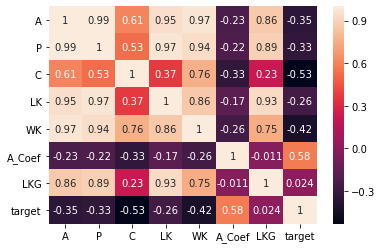

In [7]:
sns.heatmap(df.corr(),annot = True)

- PCA is the best way to handle multicollinearity

In [8]:
df['target'].value_counts()

2    70
1    70
0    70
Name: target, dtype: int64

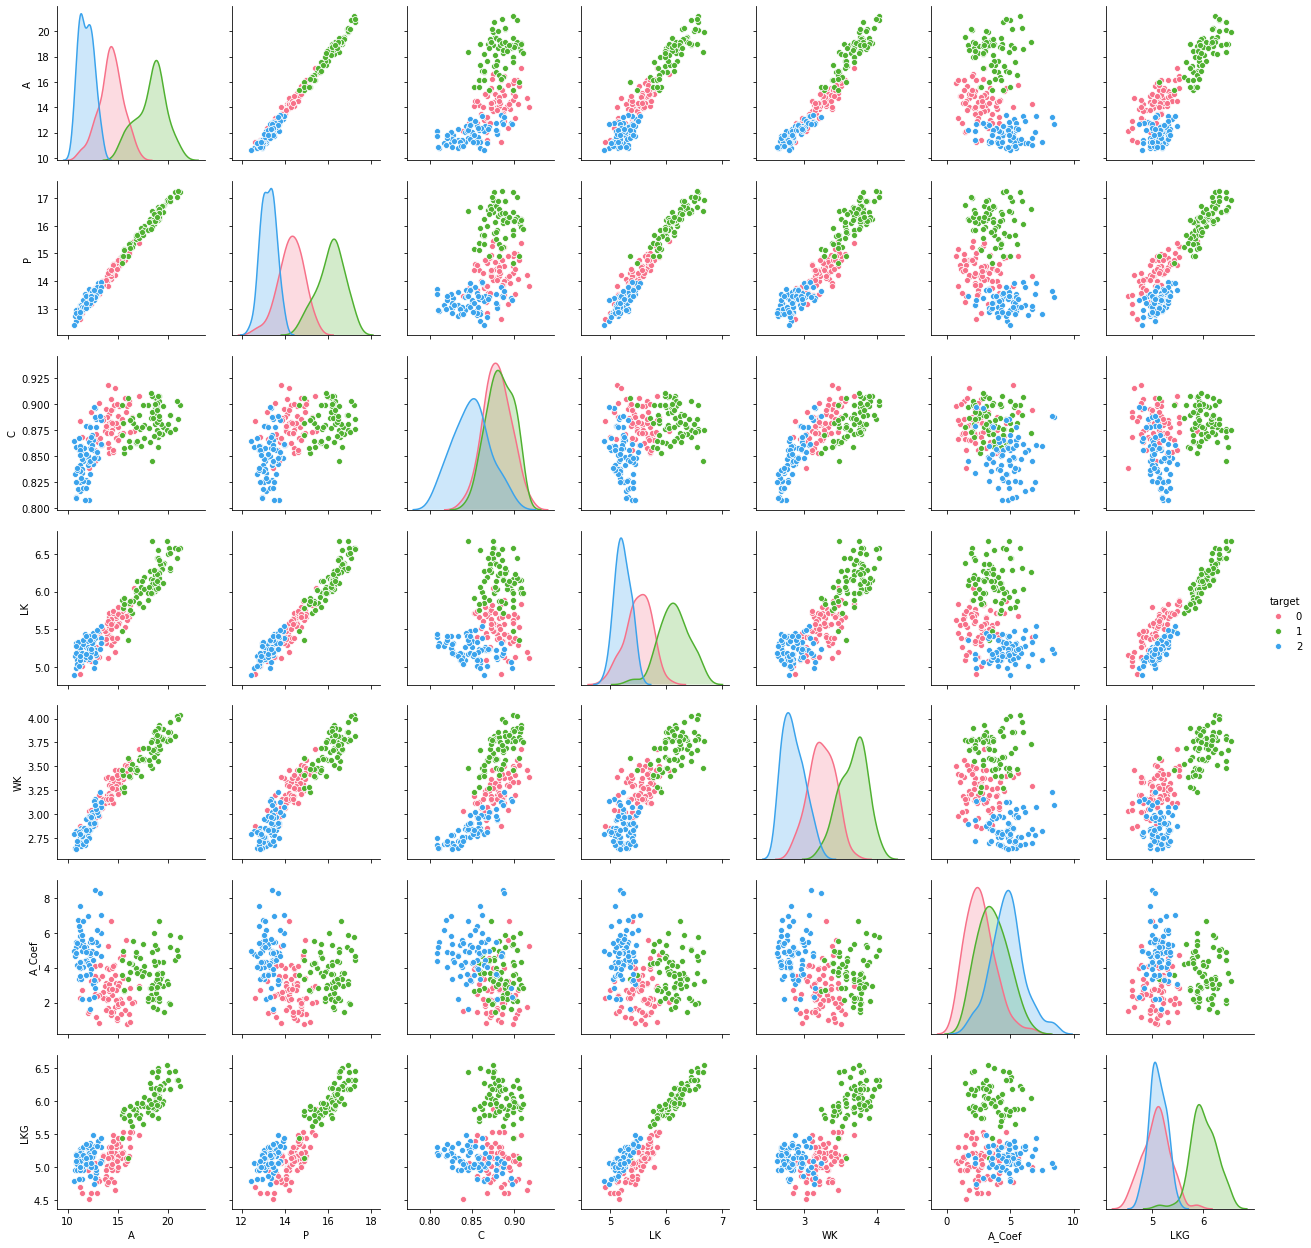

In [9]:
sns.pairplot(df,vars = ['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'],hue = 'target',palette='husl')

- Compactness is a bi-model distribution
- It is a weak feature because it is not discriminating all three clusters.Its just discriminating 2 clusters.
- LKG also have an overlap.
- But we wont remove these features. We will take all the features while building our model

In [10]:
#declaring x and y
y = df['target']
X = df.drop('target',axis = 1)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
sc.fit(X,y)
X_std=sc.fit_transform(X)
X_std_df=pd.DataFrame(X_std)

Now we are going to build our machine learning clustering models. 

we will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

For k-means clustering algorithm:

* First of all I will find the best k value.
* Than I will use this k value to create a k-means model.
* And I will compare my original and k-means clustered datas.

For hierarchical clustering algorithm:

* First I will apply a dendrogram in order to find how many classes do I have in my data.
* Than I will use this class number to apply a hierarchical clustering algorithm.
* Lastly I will compare my original, k-means and hierarchical clustered datas.


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

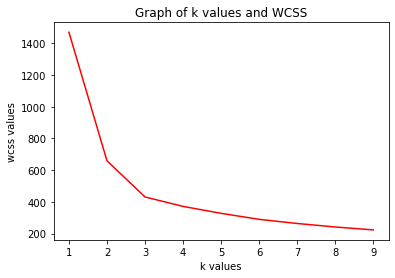

In [13]:
from sklearn.cluster import KMeans


wcss = [] #inertia (within cluster sum square) or total spread

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

We already know that our data set has three classes. 

Bu if we didn't know how many classes we have in our data set, we should use this method. 

And according to the graph; it's elbow (where it bends) is the best k value for our K Means algorithm.

### Again Building Kmeans using K = 3

In [14]:
from sklearn.cluster import KMeans

In [15]:
# Now we know our best k value is 3, I am creating a new kmeans model:

kmean = KMeans(n_clusters = 3,n_init = 15,random_state = 2)
kmean.fit(X_std)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [16]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
kmean.cluster_centers_

array([[ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787],
       [-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311],
       [-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856]])

In [18]:
#creating a dataframe for the above centroids

centroids = kmean.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(X_std_df))
columns = list(X_std_df)
centroid_df.columns = X.columns
centroid_df

,A,P,C,LK,WK,A_Coef,LKG
0,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308
1,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893
2,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809


- In Compactness C there is a overlap see the value 0.5 and 0.44. they both are close to each other
- In LKG abba(-0.585) and Indian(-0.624) are quite near to each other

In [19]:
#inertia score

kmean.inertia_

430.6589731513006

In [20]:
from sklearn import metrics

#used to judge the overall quality of Cluster
metrics.silhouette_score(X_std,kmean.labels_)

0.4007270552751299

- We should not get a negative score
- Hihger the value better it is

# Day 2 - 6.8.2020

How to select the top 2 features from centroids?
- Whichever centroid very well discriminates the clusters 
- Example CODE 18 ,Area feature right end is 1.25 and left end is -1.03 and close to origin is -0.14 so this centroid separate the features very well
- Area,perimeter,WK,LK are strong features because they separate the feature very well(see the values as above done in Area)
- By EDA we alreaddy know that Compactness overlap so its a weaker feature.

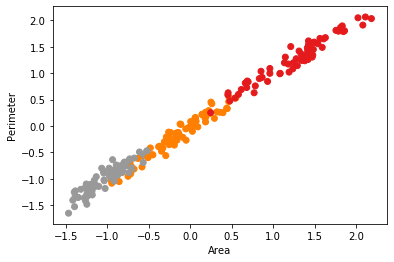

In [21]:
#Building 2-D Scatter plot

#Plot the training points(scatter plot of PC1 and PC2 dimensions only)
#X_std[:,0] = AREA ,X_std[:,1] = PERIMETER
plt.scatter(X_std[:,0],X_std[:,1],c = kmean.labels_,cmap = plt.cm.Set1)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

- **Whenever we want to see the cluster results as a scatter plot we can use labels as colour coding**

- Area and Perimeter exhibhit strong collinearity(strong positive correlation)
- Red ones are clearly separated,but grey and orange overlaps
- Grey = Indian group, Red = Massa , Orange = Abba

In [22]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

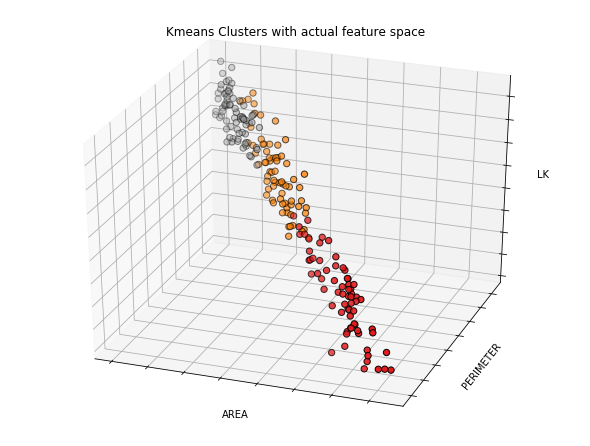

In [23]:
#Building 3-D plot
# To getter a better understanding of interaction of the dimensions

# X-axis = AREA, y-axis = PERIMETER, z-axis = LK

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=250)
ax.scatter(X_std[:, 0], X_std[:, 1], X_std[:, 3], c=kmean.labels_,
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("Kmeans Clusters with actual feature space")
ax.set_xlabel("AREA")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PERIMETER")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("LK")
ax.w_zaxis.set_ticklabels([])

plt.show()

- Here in AREA right part is positive, in PERIMETER, left part is positive,in LKG lower half is positive
- Change the Azimudding angle(azim) to see the best angle for display

# Day 3

In [24]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation 
#between the distance of points in feature space and 
#distance on dendrogram
# closer it is to 1, the better is the clustering
#min or single | max or complete | 
Z = linkage(X_std, 'ward')   # cophenetic distance (single/complete/average)
c, coph_dists = cophenet(Z , pdist(X_std))

c

0.7285528540866004

- Single = MIN, complete = MAX, average = AVERAGE
- MIN linkage is giving value of 0.42
- MAX linkage is giving value of 0.712
- AVERAGE linkage is giving value of 0.714
- WARD linkage is giving value of 0.728
- **WARD linkage is giving the best score out of all other score**
- LINKAGE is a cruicial hyperparameter for  Agglomerartive Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering 
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
agg.fit(X_std_df)

AgglomerativeClustering(n_clusters=3)

In [26]:
agg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

- **THERE IS NO INERTIA IN AGGLOMERATIVE CLUSTERING**

In [27]:
L=pd.DataFrame(agg.labels_)
L[0].value_counts()

0    73
1    70
2    67
Name: 0, dtype: int64

- **Value count of each 0,1 and 2**

In [28]:
#checking the head 

X_std_df.head()

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [29]:
# Adding a label feature with the predicted class values:
X_std_df_labeled = X_std_df.copy(deep=True)
X_std_df_labeled['class'] = agg.labels_

In [30]:
X_std_df_labeled.head()

,0,1,2,3,4,5,6,class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,0
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,0
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,0
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,0
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,0


In [31]:
X_std_df_labeled['class'].value_counts()

0    73
1    70
2    67
Name: class, dtype: int64

In [32]:
#Segrergatting dataframe

AGC_clusters = X_std_df_labeled.groupby(['class'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [33]:
#shape of each of them
Df0.shape,Df1.shape,Df2.shape

((73, 8), (70, 8), (67, 8))

In [34]:
#each df0,df1,df2 contains its class label as 0,1,and 2
Df0.head()

,0,1,2,3,4,5,6,class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,0
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,0
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,0
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,0
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,0


In [35]:
#Simply applying the mean
C0=np.array(Df0.mean())
C1=np.array(Df1.mean())
C2=np.array(Df2.mean())

In [36]:
#leaving the label
#C0 is centroid

C0=C0[:-1]
C0 #Abba group

array([-0.22340186, -0.25000973,  0.34750811, -0.34004066, -0.08532778,
       -0.72535983, -0.65651131])

In [37]:
#leaving the label(last record label-:-1)
#C1 is centroid

C1=C1[:-1]
C1 #Massa group

array([ 1.21398281,  1.21744501,  0.56850541,  1.19825643,  1.13059428,
       -0.04069661,  1.24268596])

In [38]:
#leaving the label(last record label-:-1)
#C2 is centroid

C2=C2[:-1]
C2 #Indian group

array([-1.02493226, -0.99955881, -0.97258911, -0.88141764, -1.08824882,
        0.83283627, -0.58302525])

### Now finding INERTIA for Agglomerative Clustering

In [39]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)

In [40]:
#printing individual inertia score
AGC_I0,AGC_I1,AGC_I2

(167.88479440021223, 156.40073947816478, 120.76351448951594)

- Higher the inertia,lesser the homogeniety
- Abba group(167.88) and Maasa group(156.40) the spread is large than Indian group(120.76)
- Indian group has highly compact cluster so its HIGHLY HOMOGENEOUS

In [41]:
AGC_I0+AGC_I1+AGC_I2 

445.04904836789296

- Total Inertia for all the group is 445.049
- Inertia for Kmeans was 430
- Total inertia for Agglomerative is higher than K means cluster

Conclusion
- Kmeans is highly homogeneous than the Agglomerative clustering
- **So Kmeans inertia is a better score than Agglomerative Clustering**

In [42]:
#inertia for Kmeans
kmean.inertia_

430.6589731513006

In [43]:
#Silhouette score for Agglomerative clustering
metrics.silhouette_score(X_std,agg.labels_)

0.39263397091010155

In [44]:
#Silhouette score for Kmeans clustering
metrics.silhouette_score(X_std,kmean.labels_)

0.4007270552751299

- There is a marginal drop in Silhouette score for Agglomerative because there is a rise in inertia

In [45]:
#60 record gives gives label number zero(0)
X_std_df_labeled.loc[60]

0       -1.180780
1       -1.304288
2       -0.114477
3       -1.403898
4       -1.084367
5       -0.666813
6       -1.633810
class    0.000000
Name: 60, dtype: float64

- **To check which colour belongs to which group in the below DENDOGRAM  we can manually use X_std_df_labeled.loc[] and enter the value we desire to know its label which here is 0,1,and 2 and can judge according which label belongs to Massa,abba and indian an DECODE THE COLOUR**
- **And the number that we enter in .loc[] should be a record index number meaning number without paranthesis**

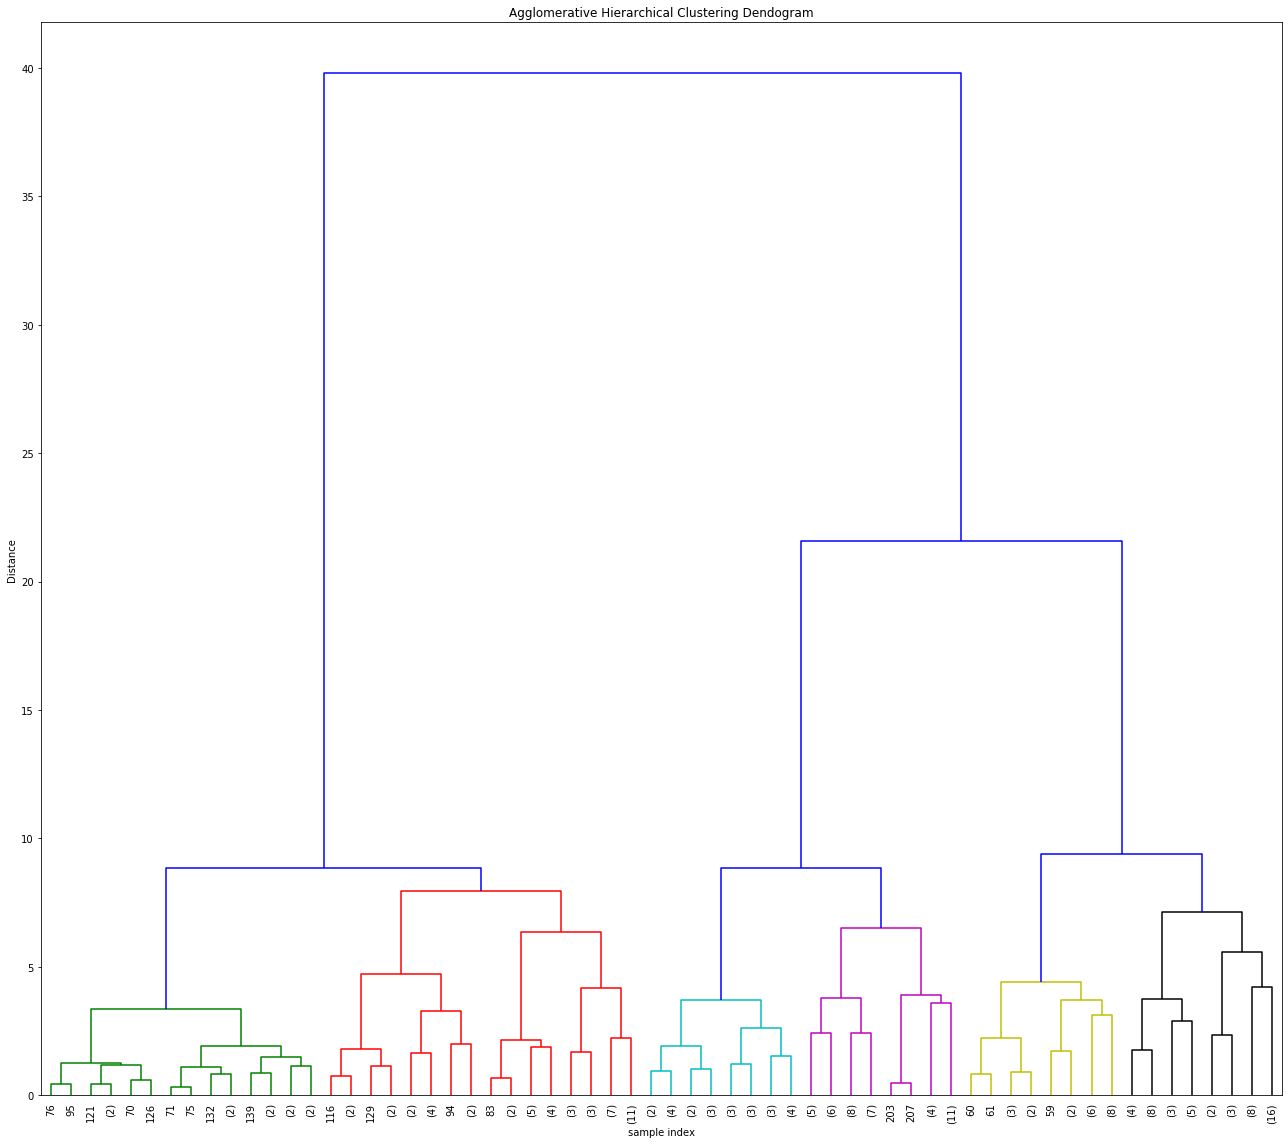

In [46]:
#Visulaizing dendogram

from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std_df, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

- **Here blue and red belongs to Massa**

- **Blue and  purple belongs to Indian**

- **Yellow and black belongs to Abba**

- These numbers written below the graph is rotated using function **LEAF ROATATION**
- **LEAF FRONT SIZE** gives the font size of the numbers written above
- **COLOR THRESHOLD** 
- **TRUNCATE MODE** for the level
- **P** is the total number of level. Without truncate mode,P wont work. Truncate and P will always come in pair
- Numbers without paranthesis are record index number. It means below this there are no descision. Means its a pure node
- Numbers with paranthesis means for example (2) it means below this there are two more records.But those are not visible. So if you increase the P we can see all the record
- So (2) represents the number of records below them

## Sub cluster analysis

### Taking the MAssa group or any group that you want to perform the subcluster analysis

In [47]:
#printing the head of DF1(Massa group)
Df1.head()

,0,1,2,3,4,5,6,class
9,0.548607,0.530158,0.721222,0.577969,0.653891,-1.154155,0.254796,1
35,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238,1
37,0.769087,0.629940,1.565405,0.460324,1.126272,-0.496143,0.154859,1
43,0.224778,0.230813,0.466694,0.562132,0.364623,0.673878,0.244598,1
70,0.958561,1.090470,-0.156898,1.272528,0.802505,0.250537,1.329628,1


In [48]:
#dropping the class feature
Df1=Df1.drop('class',axis=1)

In [49]:
#now checking the shape
Df1.shape

(70, 7)

In [50]:
#Again building agglomerative clustering using massa group
agc_sub = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
agc_sub.fit(Df1)

AgglomerativeClustering()

In [51]:
#Again creating labels for massa group alone
Df1_copy=Df1.copy(deep=True)
Df1_copy['labels']=agc_sub.labels_


In [52]:
Df1_copy.sample(5)

,0,1,2,3,4,5,6,labels
76,0.851766,1.036742,-0.470815,0.985202,0.383200,0.082534,1.048173,1
118,1.392630,1.282358,1.264214,1.353975,1.354502,-0.040801,1.137912,0
136,0.865546,0.921609,0.318220,1.168457,0.837005,-0.116136,1.148110,1
139,0.476262,0.476430,0.593958,0.550820,0.566314,0.045867,1.048173,1
90,1.809475,1.865696,0.152777,2.154866,1.396963,-1.163488,2.123006,0


In [53]:
messa_0=Df1_copy[Df1_copy['labels']==0]
messa_0.describe()

,0,1,2,3,4,5,6,labels
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,1.415462,1.389213,0.745760,1.356193,1.336497,-0.198713,1.361701,0.0
std,0.355921,0.377675,0.608363,0.538229,0.343938,0.869484,0.527301,0.0
min,0.438367,0.338271,-1.094408,0.182048,0.600814,-1.485494,0.071238,0.0
25%,1.258276,1.240143,0.294888,0.993121,1.132907,-0.957818,1.027778,0.0
50%,1.409855,1.351437,0.780612,1.353975,1.359809,-0.424808,1.405091,0.0
75%,1.575215,1.631593,1.198461,1.745371,1.545577,0.413873,1.685526,0.0
max,2.181534,2.065260,1.688427,2.367533,2.055112,1.987902,2.328998,0.0


In [54]:
messa_1=Df1_copy[Df1_copy['labels']==1]
messa_1.describe()

,0,1,2,3,4,5,6,labels
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.673171,0.756384,0.092718,0.774322,0.577907,0.383452,0.923225,1.0
std,0.303816,0.326872,0.385116,0.348691,0.234068,0.355961,0.292280,0.0
min,0.183438,0.230813,-0.517479,0.202410,0.024933,-0.116136,0.244598,1.0
25%,0.465927,0.560860,-0.271435,0.554214,0.389835,0.064201,0.789153,1.0
50%,0.679517,0.814152,0.224893,0.790635,0.566314,0.377206,0.956394,1.0
75%,0.858656,0.959987,0.424273,0.979546,0.805159,0.604544,1.101201,1.0
max,1.309950,1.420517,0.661832,1.485194,0.890082,1.221221,1.415289,1.0


In [55]:
messa_0.shape

(51, 8)

In [56]:
messa_1.shape

(19, 8)

In [57]:
messa_0_cent=np.array(np.mean(messa_0.iloc[:,:-1]))
messa_1_cent=np.array(np.mean(messa_1.iloc[:,:-1]))

In [58]:
#centroid of messa with label zero
messa_0_cent

array([ 1.41546184,  1.38921295,  0.74575971,  1.35619265,  1.3364972 ,
       -0.19871271,  1.36170085])

In [59]:
#centroid of messa with label one
messa_1_cent

array([0.67317068, 0.75638367, 0.09271755, 0.77432236, 0.57790748,
       0.38345189, 0.92322494])

- Massa 0 is larger than Massa 1 as its more on the positive side

- **Now we approach to the client and say to them that we  i have done a subcluster analysis on the Massa group and we say that massa with class 0 is relatively larger than Massa with class 1**

# Day 4

# PCA

In [60]:
#Step-1 Find the covariance matrix of X

#obtain covariance matrix for X
cov_matrix = np.cov(X_std,rowvar = False)

#Note that covariance matrix is 8x8 since it has 8 features
print('Covariance matrix of X is',cov_matrix)

Covariance matrix of X is [[ 1.00478469  0.99909854  0.61119889  0.9545308   0.97541544 -0.23067077
   0.86782525]
 [ 0.99909854  1.00478469  0.53177587  0.97707507  0.94935008 -0.21838028
   0.89504603]
 [ 0.61119889  0.53177587  1.00478469  0.36967551  0.7652787  -0.33305686
   0.22791011]
 [ 0.9545308   0.97707507  0.36967551  1.00478469  0.86453176 -0.1723833
   0.93726927]
 [ 0.97541544  0.94935008  0.7652787   0.86453176  1.00478469 -0.25927117
   0.75271583]
 [-0.23067077 -0.21838028 -0.33305686 -0.1723833  -0.25927117  1.00478469
  -0.01113203]
 [ 0.86782525  0.89504603  0.22791011  0.93726927  0.75271583 -0.01113203
   1.00478469]]


- **By default np.cov takes row-wise, but we need a column wise we can use rowvar = False**

In [61]:
#Step-2 Obtain eigen values and eigen vectors


eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)

#eigenvectors is 8x8 matrix
print('Eigenvectors of Cov(X)',eigenvectors)

#eigenvalues is a 8x1 vector
print('Eigenvalues of Cov(X)',eigenvalues)

Eigenvectors of Cov(X) [[ 0.44447352  0.02656355 -0.02587094  0.19363997  0.20441167 -0.73480569
  -0.42643686]
 [ 0.44157147  0.08400282  0.05983912  0.29545659  0.17427591  0.67075153
  -0.47623853]
 [ 0.27701737 -0.52915125 -0.62969178 -0.3328164  -0.33265481  0.0725527
  -0.14162884]
 [ 0.42356333  0.20597518  0.21187966  0.26340659 -0.76609839 -0.04627605
   0.27357647]
 [ 0.43281866 -0.11668963 -0.21648338  0.19963039  0.46536555  0.03928908
   0.70301171]
 [-0.11869248  0.71688203 -0.67950584  0.09246481 -0.03625822  0.00372346
  -0.01964186]
 [ 0.38716084  0.37719327  0.2138972  -0.80414995  0.11134657  0.0344981
   0.04282974]]
Eigenvalues of Cov(X) [5.05527392e+00 1.20330286e+00 6.81247474e-01 6.86915798e-02
 1.88031478e-02 8.16283865e-04 5.35755786e-03]


- **Interpret these values column wise, so vectors for 1st feature is 0.444,0.441,0.277,0.42,0.43,-0.11,-.38**

In [62]:
#eigenvalues
eigenvalues

array([5.05527392e+00, 1.20330286e+00, 6.81247474e-01, 6.86915798e-02,
       1.88031478e-02, 8.16283865e-04, 5.35755786e-03])

In [63]:
#if we want to find out the variance expressed
#What is the total variance expressed by the first vector

5.05527392/(np.sum(eigenvalues))

0.7187430267210884

- **First vector is expressing a variance of 71.8%. This indicates that first vector holding  much of the variance. Its one of the indicating factor that data has more amount of redundency.**
- **Remaining 30% of variance is shared by rest of the vectors**

In [64]:
#What is the total variance expressed by the second vector

1.20330286/(np.sum(eigenvalues))

0.17108183519727888

In [65]:
#Cumulative of first two vector

5.05527392/(np.sum(eigenvalues))+1.20330286/(np.sum(eigenvalues))

0.8898248619183673

- **Second vector is expressing a variance of 17%.There is a drastic drop from first vec which is 71%**
- **71+17 = 89% variance is held by first two vectors**
- **Remaining vectors are holding around 12% variance**

- **Eigenvalues are scaler values. They are telling us about the magnitude**
- **Eigenvectors are telling us about the direction**

In [66]:
#Step 3: Sort eigenvalues in descending order

#Make a set of (eigenvalues,eigenvectors) pairs
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]

#Sort the (eigenvalues,eigenvectors) pairs from highest to lowest with respect to eigen values
eig_pairs.sort()
eig_pairs.reverse()

#Extract the descending ordered eigenvalues and eigenvectors
eigenvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]   #List of list
eigenvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvectors))] #List of list

#Lets confirm our sorting worked,print out eigenvalues
print('EigenValues in descending order: \n%s'%eigenvalues_sort)

print('\n')

#Lets confirm our sorting worked,print out eigenvectors
print('EigenVectors in descending order: \n%s'%eigenvectors_sort)

EigenValues in descending order: 
[5.055273918920042, 1.2033028605929323, 0.681247474171741, 0.06869157975283621, 0.01880314780179106, 0.005357557861666421, 0.0008162838654988057]


EigenVectors in descending order: 
[array([ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
       -0.11869248,  0.38716084]), array([ 0.02656355,  0.08400282, -0.52915125,  0.20597518, -0.11668963,
        0.71688203,  0.37719327]), array([-0.02587094,  0.05983912, -0.62969178,  0.21187966, -0.21648338,
       -0.67950584,  0.2138972 ]), array([ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
        0.09246481, -0.80414995]), array([ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
       -0.03625822,  0.11134657]), array([-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
       -0.01964186,  0.04282974]), array([-0.73480569,  0.67075153,  0.0725527 , -0.04627605,  0.03928908,
        0.00372346,  0.0344981 ])]


- **See line 61 there eigenvectors were columnwise. Now after sorting its row wise**
- **In step 4 we will again transpose it to columnwise because our input X_std is column wise**

- **After sorting we dont need eigenvalues as it only gives magnitude.**
- **We will go ahead with eigenvectors**

In [67]:
tot = sum(eigenvalues)
var_explained = [(i/tot)*100 for i in sorted(eigenvalues,reverse = True)]  #an array of variance explained by each

cum_var_exp = np.cumsum(var_explained) 
print(cum_var_exp)

[ 71.87430266  88.98248618  98.66824959  99.64488498  99.91222225
  99.98839433 100.        ]


- **We can see that vectors are expressing variance as:first vector = 71.8%,second vector = 88.9%,third vector = 98%**
- **Remaining 4 vectors are just combinely contributing to 1% of variance/spread.**

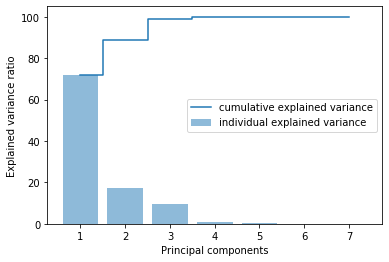

In [68]:
plt.bar(range (1,8), var_explained, alpha = 0.5, align = 'center', label='individual explained variance')
plt.step(range(1,8), cum_var_exp, where = 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend (loc = 'best')
plt.show()

- **We can see that inital three vectors are holding the maximum variance**
- **Here in the graph seeing the cumulative part,we can see there is noise/redundency in the end part as variance xpressed by the last few vectors is very less**

In [69]:
#Step 4: Project data onto 2d

# Keep the first two principal components

P_reduce = np.array(eigenvectors_sort[0:2]).transpose()

# Let's project data onto 2D space 
Proj_data_2D = np.dot(X_std,P_reduce)   


X_std.shape, P_reduce.shape,Proj_data_2D.shape


((210, 7), (7, 2), (210, 2))

- **For matrix multiplication we will use eigen vector and transpose it**
- **Proj_data_2D = X_pca, we can name it anything**

In [70]:
from sklearn.cluster import KMeans
# Now we know our best k value is 3, I am creating a new kmeans model:
kmean = KMeans(n_clusters=3,n_init=15,random_state=2)
kmean.fit(Proj_data_2D)


KMeans(n_clusters=3, n_init=15, random_state=2)

In [71]:
kmean.cluster_centers_

array([[-0.30280708, -1.01713985],
       [ 2.80525792,  0.41690012],
       [-2.34014325,  0.63805298]])

In [72]:
kmean.inertia_

270.3316934585105

In [73]:
from sklearn import metrics

#used to judge the overall quality of Cluster
metrics.silhouette_score(Proj_data_2D,kmean.labels_)

0.49343048696031905

- **Silhoutte score increased from 0.400 to 0.493**
- **Inertia reduced from 430.65 to 270.33**
- **We can see silhoutee score increased after doing PCA and inertia got reduced which is good**
- **Clustering quality got improved**

In [74]:
#creating a dataframe for the above centroids

centroids=kmean.cluster_centers_
centroid_df = pd.DataFrame(centroids) #,columns = list(X_std_df)
centroid_df.columns=['PC1','PC2']
centroid_df

,PC1,PC2
0,-0.302807,-1.017140
1,2.805258,0.416900
2,-2.340143,0.638053


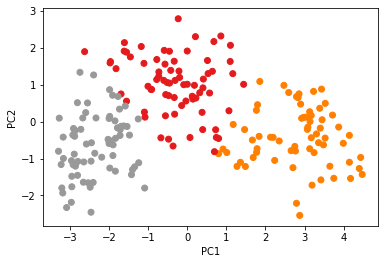

In [81]:
# Plot the training points (scatter plot of PC1 and PC2 dimensions only),edgecolor='k'
plt.scatter(X_reduced[:, 0], X_reduced[:,1 ], c=kmean.labels_, cmap=plt.cm.Set1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- **We can see that data is clearly separable**

In [75]:
#Centroid of Label-1, indicates Large size grain (Massa)
#Centroid of Label-0, indicates Average size grain (Abba)
#Centroid of Label-3, indicates small size grain (Indian)


# PCA using Sklearn

In [76]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

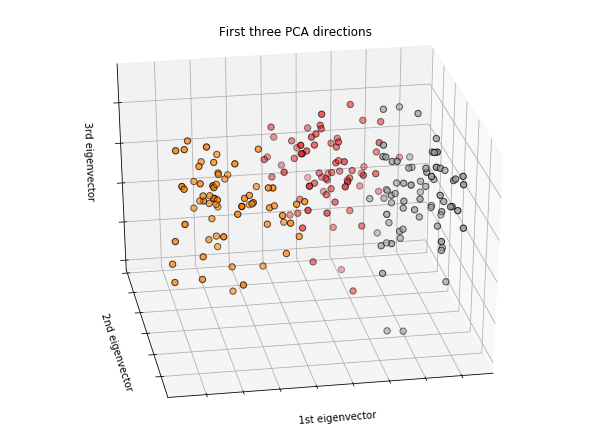

In [79]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=100)
X_reduced = PCA(n_components=3).fit_transform(X_std) #210 x7
ax.scatter(X_reduced[:,0], X_reduced[:, 1],X_reduced[:,2], c=kmean.labels_,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()